In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
#import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm

In [2]:
data = pd.read_csv("LR_1.csv", header=0)
data

,House Price,Square Feet,City
0,245,1400,N
1,312,1600,Y
2,279,1700,N
3,308,1875,Y
4,199,1100,N
5,219,1550,N
6,405,2350,Y
7,324,2450,Y
8,319,1425,Y
9,255,1700,N


In [3]:
print(data.shape)
#print(data.head())
#print(data.tail(6))
data.dtypes

(10, 3)


House Price     int64
Square Feet     int64
City           object
dtype: object

In [4]:
#Get all categorical variables and create dummies
obj = data.dtypes == object
print(obj)
dummydf = pd.DataFrame() 

for i in data.columns[obj]:
    dummy = pd.get_dummies(data[i], drop_first=True)
    dummydf = pd.concat([dummydf, dummy], axis=1)

print(dummydf)

House Price    False
Square Feet    False
City            True
dtype: bool
   Y
0  0
1  1
2  0
3  1
4  0
5  0
6  1
7  1
8  1
9  0


In [5]:
#Merge the dummy and dataset
data1 = data
print(data1)
data1 = pd.concat([data1,dummydf], axis=1)
print(data1)
obj1 = data1.dtypes == object
print(obj1)
data1=data1.drop(data1.columns[obj1], axis = 1)
print(data1)

   House Price  Square Feet City
0          245         1400    N
1          312         1600    Y
2          279         1700    N
3          308         1875    Y
4          199         1100    N
5          219         1550    N
6          405         2350    Y
7          324         2450    Y
8          319         1425    Y
9          255         1700    N
   House Price  Square Feet City  Y
0          245         1400    N  0
1          312         1600    Y  1
2          279         1700    N  0
3          308         1875    Y  1
4          199         1100    N  0
5          219         1550    N  0
6          405         2350    Y  1
7          324         2450    Y  1
8          319         1425    Y  1
9          255         1700    N  0
House Price    False
Square Feet    False
City            True
Y              False
dtype: bool
   House Price  Square Feet  Y
0          245         1400  0
1          312         1600  1
2          279         1700  0
3          308       

In [6]:
data1.columns = ['House Price', 'Square Feet', 'New City']
print(data1)

   House Price  Square Feet  New City
0          245         1400         0
1          312         1600         1
2          279         1700         0
3          308         1875         1
4          199         1100         0
5          219         1550         0
6          405         2350         1
7          324         2450         1
8          319         1425         1
9          255         1700         0


In [7]:
#Declare the dependent variable and create your independent and dependent datasets
X = data1.drop('House Price', axis=1)
Y = data1['House Price']

In [8]:
X.shape, Y.shape

((10, 2), (10,))

In [9]:
X.columns

Index(['Square Feet', 'New City'], dtype='object')

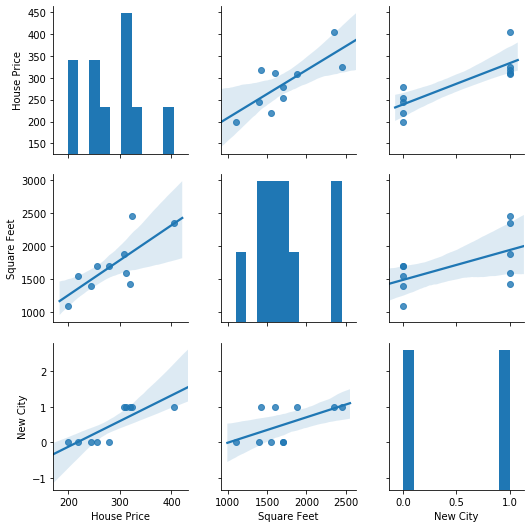

In [10]:
#Scatter plots
sns.pairplot(data1, kind='reg')
plt.show()

In [11]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.20, random_state=5)

In [12]:
#!pip install statsmodels
from statsmodels.api import OLS
#Run model
lm = sm.OLS(Y_train,X_train).fit()
print(lm.summary())


                                 OLS Regression Results                                
Dep. Variable:            House Price   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              143.1
Date:                Wed, 13 May 2020   Prob (F-statistic):                    8.65e-06
Time:                        23:23:42   Log-Likelihood:                         -41.550
No. Observations:                   8   AIC:                                      87.10
Df Residuals:                       6   BIC:                                      87.26
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [13]:
pred_train = lm.predict(X_train)
err_train = pred_train - Y_train

#Predict
pred_test = lm.predict(X_test)
err_test = pred_test - Y_test

In [14]:
#Actual vs predicted plot
Err_table1 = pd.concat((Y_train, pred_train, err_train), axis = 1)
print(Err_table1.__class__)
Err_table1.columns = ['Actuals','Predicted','Error']
print(Err_table1)

<class 'pandas.core.frame.DataFrame'>
   Actuals   Predicted      Error
2      279  266.406503 -12.593497
4      199  172.380679 -26.619321
7      324  413.521951  89.521951
1      312  280.318699 -31.681301
0      245  219.393591 -25.606409
8      319  252.894500 -66.105500
6      405  397.850980  -7.149020
3      308  323.413869  15.413869


In [15]:
#Actual vs predicted plot
Err_table = pd.concat((Y_test, pred_test, err_test), axis = 1)
print(Err_table.__class__)
Err_table.columns = ['Actuals','Predicted','Error']
print(Err_table)

<class 'pandas.core.frame.DataFrame'>
   Actuals   Predicted      Error
9      255  266.406503  11.406503
5      219  242.900047  23.900047


No handles with labels found to put in legend.


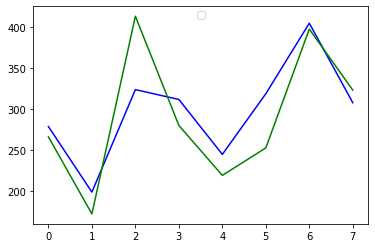

In [16]:
index = np.arange(len(Err_table1))
plt.plot(index,Err_table1['Actuals'], color = 'b')
plt.plot(index,Err_table1['Predicted'], color = 'g')
plt.legend(loc = "upper center")
plt.show()

Text(0.5, 1.0, 'Main')

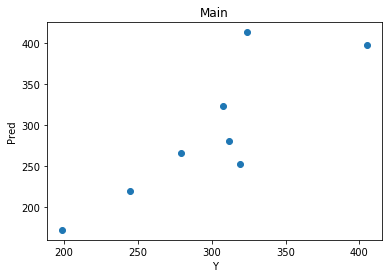

In [17]:
plt.scatter(Y_train, pred_train)
plt.xlabel('Y')
plt.ylabel('Pred')
plt.title('Main')

Text(0, 0.5, 'Residuals')

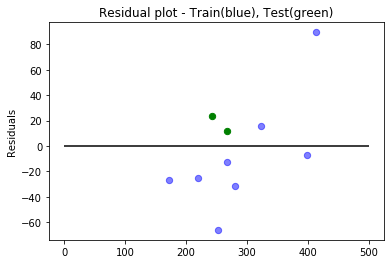

In [18]:
#Residual plots
plt.scatter(pred_train, err_train, c="b", s=40, alpha=0.5)
plt.scatter(pred_test,err_test, c="g", s=40)
plt.hlines(y=0, xmin=0, xmax=500)
plt.title('Residual plot - Train(blue), Test(green)')
plt.ylabel('Residuals')

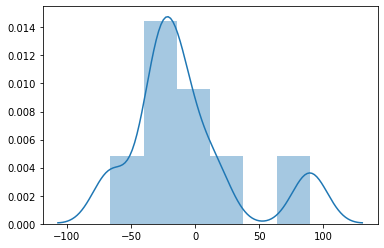

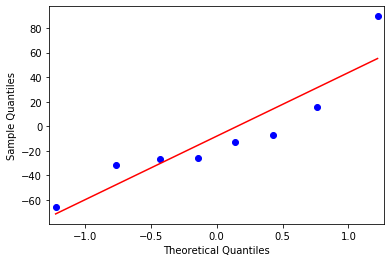

In [19]:
from statsmodels.api import qqplot
err_train
sns.distplot(err_train)
qqplot(err_train, line = "r")
#plt.plot([0,1],[0,1],'r--')
plt.show()

In [20]:
# Root Mean Square Error
print(np.sqrt(np.mean(err_test**2)))

18.725925634096647
